In [86]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [87]:
from statiskit import (linalg,
                       core,
                       pgm)

In [88]:
import math
import os

# Simuler un graphe cordal $\Theta$ et les données data avec le fichier sampling

In [98]:
if not 'K' in os.environ:
    os.environ['K'] = str(10)
K = int(os.environ.get('K'))
simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
graph = pgm.read_gml(os.path.join('results', 'graph.gml'))
while not graph.is_chordal:
    simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
    graph = pgm.read_gml(os.path.join('results', 'graph.gml'))

data = core.read_csv(os.path.join('results', 'data.csv'))
data

10

# Estimation par   newton-raphson

In [90]:
algo = os.environ.get('ALGO', 'nr')

In [91]:
import time
prev = time.time()
nre = pgm.graphical_gaussian_estimation(algo=algo,
                                        data=data,
                                        graph=graph)
curr = time.time()

# Estimation par maximum vraisemblance MLE

In [92]:
import sys 
try:
    mle = pgm.graphical_gaussian_estimation(algo='ml',
                                        data=data,
                                        graph=graph)
except:
    mle = nre
    print ("theta non semi-def positive")
#finally:
#    sys.exit(0) 

# Calcul de $\widehat{\Theta}_{ML}$  et  $\widehat{\Theta}_{NR}$

In [93]:
theta_ML = mle.estimated.graph
theta_NR = nre.estimated.graph

<IPython.core.display.Javascript object>


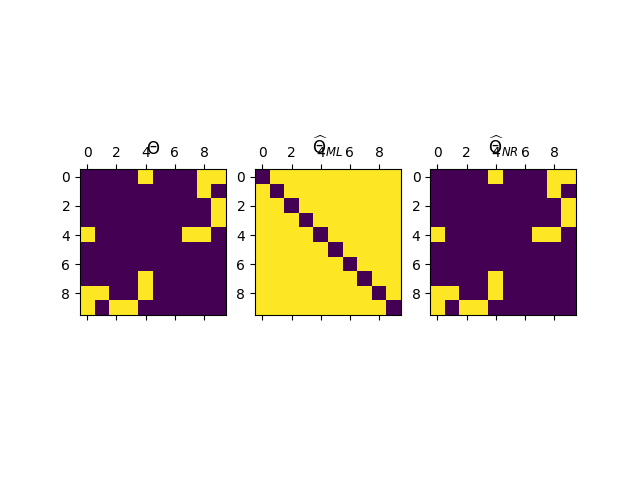

In [94]:
fig = pyplot.figure()
axes = graph.to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title(r'$\Theta$')
axes = theta_ML.to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title(r'$\widehat{\Theta}_{ML}$')
axes = theta_NR.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title(r'$\widehat{\Theta}_{NR}$')

# Comparaison des deux algorithmes.

In [95]:

LLH_ML = 2 * mle.estimated.loglikelihood(data)

LLH_NR = 2 * nre.estimated.loglikelihood(data)


(LLH_ML - LLH_NR )/LLH_ML

nan

In [96]:
LLH_ML, LLH_NR

(nan, -254.50384839203303)

In [97]:
import math
with open(os.path.join('results', 'estimation.csv'), 'a') as filehandler:
    filehandler.write(','.join([str(K), str(algo), str(curr-prev), str((LLH_ML - LLH_NR )/math.fabs(LLH_ML))]) + '\n')